In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv(r"C:\Users\Acer\Desktop\climate data\sea_levels_2015.csv")
df

,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2
...,...,...,...
1603,2013-08-15,71.6,8.8
1604,2013-09-15,68.8,8.8
1605,2013-10-15,66.4,8.9
1606,2013-11-15,59.7,9.0


#### GMSL = Global Mean Sea Level – Qlobal Orta Dəniz Səviyyəsi (mm)
#### GMSL uncertainty (GMSL qeyri-müəyyənliyi) – Ölçmələrdə olan qeyri-müəyyənlikdir ( ± səhv ehtimalını)

In [3]:
#Time sütunu datetime-a çevirilir.
df['Time'] = pd.to_datetime(df['Time'])
#Hər bir tarix üçün il alınır.
df['Year'] = df['Time'].dt.year
#10 illik hesablama 
df['onillik'] = (df['Year'] // 10 ) * 10
#10 illik ucun GMSL ortalamasi
ortalama = df.groupby("onillik")["GMSL"].mean().reset_index()
ortalama.index = ortalama.index + 1

In [4]:
ortalama

,onillik,GMSL
1,1880,-153.660000
2,1890,-141.960000
3,1900,-127.855000
4,1910,-114.682500
5,1920,-110.035833
6,1930,-98.328333
7,1940,-78.907500
8,1950,-56.751667
9,1960,-44.035000
10,1970,-25.925833


In [6]:
df['onillik'] = df['onillik'].astype(int)
df['GMSL'] = df['GMSL'].astype(float)

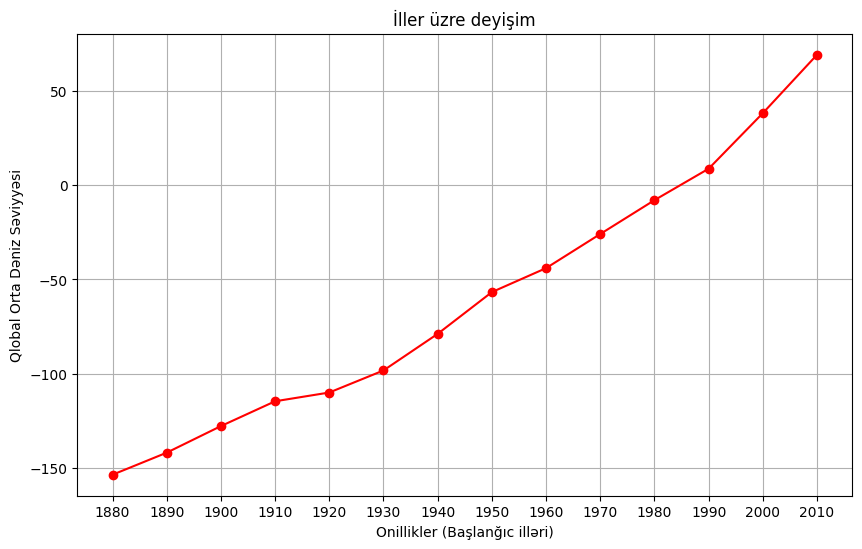

In [14]:
plt.figure(figsize=(10,6))
plt.plot(ortalama['onillik'], ortalama['GMSL'], 'r-o')
plt.xticks(range(int(df['onillik'].min()), int(df['onillik'].max())+10, 10))
plt.xlabel('Onillikler (Başlanğıc illəri)')
plt.ylabel('Qlobal Orta Dəniz Səviyyəsi')
plt.title('İller üzre deyişim')
plt.grid(True)
plt.show()
